In [2]:
import cupy as cp
import cupyx
import scanpy as sc
import scanpy as sc
import numpy as np
from cupyx.scipy.sparse import csr_matrix
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import random
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import os
import gzip
import numpy as np
import scanpy as sc
import squidpy as sq
import cupy as cp
import cupyx
import os
import time
import rapids_singlecell as rsc
import numpy as np
import rmm
from rmm.allocators.cupy import rmm_cupy_allocator
import cupy

rmm.reinitialize(
    managed_memory=False,  # Allows oversubscription
    pool_allocator=False,  # default is False
    devices=0,  # GPU device IDs to register. By default registers only GPU 0.
)
cp.cuda.set_allocator(rmm_cupy_allocator)
import zarr
from collections import OrderedDict
from scipy.sparse import csr_matrix
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from scipy.sparse import csr_matrix
import scipy
import anndata
from collections import OrderedDict
# from rsc_functions.utility.applyqc import applyqc
# from rsc_functions.reports.plot import plot_spatial,plot_spatial_data, plot_dist
# from rsc_functions.utility.rank_genes_groups import return_markers,rank_genes_groups
# from rsc_functions.reports.plot import plot_expression

In [3]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/output_temp"
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out_1"
FilePrefix = "_072824" 
andata = sc.read_h5ad(os.path.join(pathout, "andata_save.h5ad"))

In [4]:
import os
import pickle

file_path = os.path.join(pathout, "andata_uns_mtracies.pkl")

if os.path.getsize(file_path) > 0:
    with open(file_path, 'rb') as buff:
        andata_uns_mtracies = pickle.load(buff)
else:
    print("File is empty. Cannot load data.")
    andata_uns_mtracies = None

In [5]:
andata_uns_mtracies.keys()

dict_keys(['config', 'cluster_colors', 'rank_genes_groups', 'clusterColorMap'])

In [6]:
andata.uns['cluster_colors'] = andata_uns_mtracies['cluster_colors']
andata.uns['clusterColorMap'] = andata_uns_mtracies['clusterColorMap']
andata.uns['rank_genes_groups'] = andata_uns_mtracies['rank_genes_groups']
andata.uns['config'] = andata_uns_mtracies['config']

In [7]:
andata

AnnData object with n_obs × n_vars = 705298 × 1500
    obs: 'n_genes_by_counts', 'total_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_MT', 'pct_counts_MT', 'log1p_total_counts_MT', 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nucleus_centroid_x', 'nucleus_centroid_y', 'nucleus_area', 'z_level', 'nucleus_count', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts', 'log1p_total_counts', 'log1p_mean_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cluster_colors', 'clusterColorMap', 'rank_genes_groups', 'config'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'counts', 'log'

In [13]:
andata.uns['rank_genes_groups']

{'params': {'groupby': 'cluster',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('CD79A', 'CD22', 'CPVL', 'LAMP3', 'CD8A', 'PLVAP', 'TCF7', 'GZMB', 'CCN1', 'CD2', 'LIPA', 'CLEC4M', 'LIPA', 'CTSG', 'CR2', 'XBP1'),
            ('CD22', 'CD79A', 'ITGAX', 'FSCN1', 'GZMA', 'PECAM1', 'LEF1', 'CLEC4C', 'DPT', 'CD247', 'MMP9', 'CCL14', 'CTSC', 'CMA1', 'CXCL13', 'MZB1'),
            ('TNFRSF13C', 'CD19', 'SAMHD1', 'KIF2A', 'GZMK', 'EPAS1', 'CD247', 'MAPKAPK2', 'THBS1', 'FYN', 'CTSC', 'MARCO', 'SIGLEC1', 'KIT', 'S1PR3', 'TENT5C'),
            ...,
            ('CD247', 'TCF7', 'CD22', 'CD19', 'CD22', 'IKZF3', 'CIITA', 'CD19', 'CD247', 'PLXNB2', 'CD22', 'CD247', 'IKZF3', 'TNFRSF13C', 'CCL14', 'CD247'),
            ('TCF7', 'CD247', 'CD19', 'CD22', 'CD79A', 'CD79A', 'CD22', 'CD22', 'TCF7', 'CIITA', 'CD19', 'CCL19', 'CD79A', 'CD79A', 'LEF1', 'TCF7'),
            ('GIMAP4', 'GIMAP4', 'CD79A', 'CD79A', 

In [14]:
rsc.get.anndata_to_CPU(andata)

In [15]:
andata

AnnData object with n_obs × n_vars = 705298 × 1500
    obs: 'n_genes_by_counts', 'total_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_MT', 'pct_counts_MT', 'log1p_total_counts_MT', 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nucleus_centroid_x', 'nucleus_centroid_y', 'nucleus_area', 'z_level', 'nucleus_count', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts', 'log1p_total_counts', 'log1p_mean_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cluster_colors', 'clusterColorMap', 'rank_genes_groups', 'config'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'counts', 'log'

In [16]:
del andata.uns['rank_genes_groups']

In [17]:
sc.tl.rank_genes_groups(andata, groupby="cluster", method="wilcoxon",layer = "log")

In [18]:
import pickle
with open(os.path.join(pathout,"andata_uns_mtracies.pkl"), 'wb') as buff:
     pickle.dump({'config':andata.uns['config'],'cluster_colors':andata.uns['cluster_colors'], 'rank_genes_groups':andata.uns['rank_genes_groups'], 'clusterColorMap':andata.uns['clusterColorMap']}, buff)

In [16]:
andata.uns['rank_genes_groups'].keys()

dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])

In [21]:
pd.DataFrame(andata.uns['rank_genes_groups']['names']).loc[:,'1'].values

array(['CD22', 'CD79A', 'CD19', ..., 'TCF7', 'CD247', 'GIMAP4'],
      dtype=object)

In [20]:
df = pd.DataFrame({"genes":pd.DataFrame(andata.uns['rank_genes_groups']['names']).loc[:,'1'].values,
                    "logFC":pd.DataFrame(andata.uns['rank_genes_groups']['logfoldchanges']).loc[:,'1'].values,
                  "adj.P.Val":pd.DataFrame(andata.uns['rank_genes_groups']['pvals_adj']).loc[:,'1'].values})

In [48]:
df['adj.P.Val'] = df['adj.P.Val'].replace(0, 1)

In [51]:
up

,genes,logFC,adj.P.Val
55,CD83,1.501291,3.555017e-309
56,PAWR,1.423265,1.429064e-264
57,PNOC,2.010221,1.282698e-255


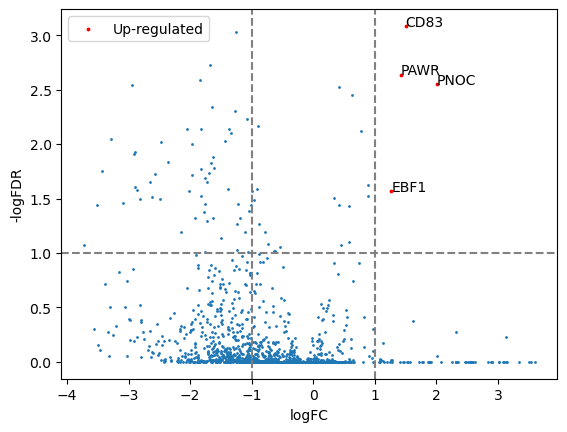

In [66]:
plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)*(1/100)),s=1)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
#down = df[(df['logFC']<=-2)&(df['adj.P.Val'].apply(lambda x:-np.log10(x)*(1/100))<=2)]
up = df[(df['logFC']>=1)&(df['adj.P.Val'].apply(lambda x:-np.log10(x)*(1/100))>=1)]
#plt.scatter(x=down['logFC'],y=down['adj.P.Val'].apply(lambda x:-np.log10(x)*(1/100)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)*(1/100)),s=3,label="Up-regulated",color="red")
for i,r in up.iterrows():
    plt.text(x=r['logFC'],y=-np.log10(r['adj.P.Val'])*(1/100),s = r['genes'])
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(1,color="grey",linestyle="--")
plt.legend(loc = 2)

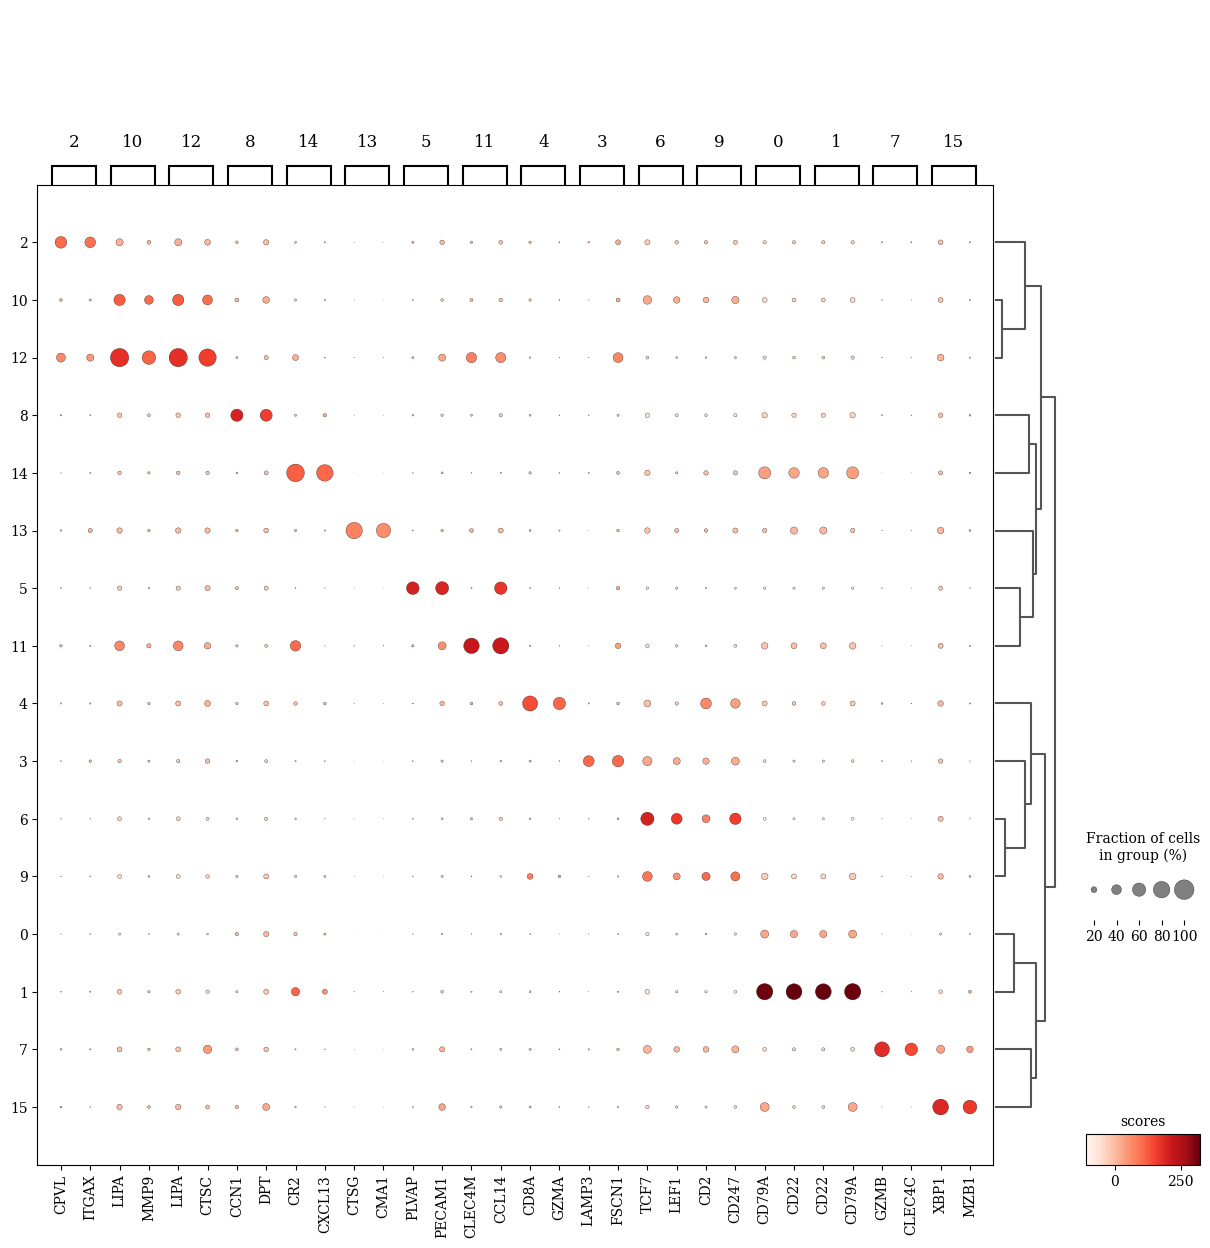

<Figure size 1920x1440 with 0 Axes>

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sc.pl.rank_genes_groups_dotplot(andata, groupby="cluster",n_genes=2,values_to_plot = 'scores',ax =ax)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

In [17]:
andata.uns['clusterColorMap'].set_index('clusters')['colors']

clusters
6     (0.7725490196078432, 0.6901960784313725, 0.835...
11    (0.7764705882352941, 0.8588235294117647, 0.937...
9     (0.4588235294117647, 0.4196078431372549, 0.694...
1     (0.9921568627450981, 0.5529411764705883, 0.235...
10    (0.17254901960784313, 0.6274509803921569, 0.17...
5     (0.5176470588235295, 0.23529411764705882, 0.22...
3     (1.0, 0.7333333333333333, 0.47058823529411764,...
7     (0.3215686274509804, 0.32941176470588235, 0.63...
0     (0.807843137254902, 0.42745098039215684, 0.741...
4     (0.7803921568627451, 0.9137254901960784, 0.752...
8     (0.9058823529411765, 0.7294117647058823, 0.321...
15    (0.9058823529411765, 0.5882352941176471, 0.611...
12    (0.38823529411764707, 0.4745098039215686, 0.22...
2     (0.2235294117647059, 0.23137254901960785, 0.47...
13    (0.6196078431372549, 0.6039215686274509, 0.784...
14    (0.596078431372549, 0.8745098039215686, 0.5411...
Name: colors, dtype: object

In [18]:
color_map = andata.uns['clusterColorMap'].set_index('clusters')['colors'].to_dict()
color_map

{'6': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 '11': (0.7764705882352941, 0.8588235294117647, 0.9372549019607843, 1.0),
 '9': (0.4588235294117647, 0.4196078431372549, 0.6941176470588235, 1.0),
 '1': (0.9921568627450981, 0.5529411764705883, 0.23529411764705882, 1.0),
 '10': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 '5': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059, 1.0),
 '3': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 '7': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098, 1.0),
 '0': (0.807843137254902, 0.42745098039215684, 0.7411764705882353, 1.0),
 '4': (0.7803921568627451, 0.9137254901960784, 0.7529411764705882, 1.0),
 '8': (0.9058823529411765, 0.7294117647058823, 0.3215686274509804, 1.0),
 '15': (0.9058823529411765, 0.5882352941176471, 0.611764705882353, 1.0),
 '12': (0.38823529411764707, 0.4745098039215686, 0.2235294117647059, 1.0),
 '2': (0.2235294117647059, 0.23137254901960785, 0.474509

In [19]:
df['color'] = df['cluster'].astype(str).map(color_map)

NameError: name 'df' is not defined

In [89]:
clusters

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15']

In [99]:
sns.set_theme(style="whitegrid", palette="pastel")
color_container = []
with PdfPages(os.path.join(pathout, f'Report_spatial_map_plot.pdf')) as pdf:
    fig, ax = plt.subplots(1, 1, figsize=(15,15))
    clusters = sorted(np.unique(df['cluster'].values), key=int)
    for i, cluster in enumerate(clusters):
        cluster_data = df[df['cluster'] == cluster]
        color_temp = cluster_data['color'][0]
        if cluster == '1':
            ax.scatter( x=cluster_data['x'], y=cluster_data['y'], color=color_temp, label=f'{cluster}', s=0.1, alpha=1)
        else:
            ax.scatter( x=cluster_data['x'], y=cluster_data['y'], color=color_temp, label=f'{cluster}', s=0.1, alpha=0.01)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlabel(xlab)
    # ax.set_ylabel(ylab)
    # ax.set_title(title)
    legend = ax.legend(title='cluster',
                        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
                        loc='upper left',
                        fontsize='small',  # Control the font size
                        title_fontsize='medium',
                         markerscale=30,  # Increase the size of the legend markers
                        frameon=False# Control the title font size
                        )
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
    pdf.savefig()
    plt.close()

/tmp/ipykernel_2771298/1315155386.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_temp = cluster_data['color'][0]


<center> cell typeing</center>

In [ ]:
# 'BCL-6', 'CD10', 'CD21', 'CD23', 'CD35', 'CD95', 'ER-TR7', 'GL7'

In [13]:
marker_genes = {
    "Germinal Centers": ["GL7", "CD95", "BCL-6","CD10","LMO2"],
    # Note: DMXL2 should be negative
    "Meddulary Cords": ["CD34", "XCR1","ER-TR7"],
    # Note HBM and GYPA are negative markers
    "Follicular dendritic cells": ["CD21", "CD23", "CD35"],
}

In [15]:
marker_genes = {
    "Germinal Centers": ["LMO2"],
    # Note: DMXL2 should be negative
    "Meddulary Cords": ["CD34", "XCR1",],
    # Note HBM and GYPA are negative markers
}

In [11]:
marker_genes.items()

dict_items([('Germinal Centers', ['GL7', 'CD95', 'BCL-6', 'CD10', 'LMO2']), ('Meddulary Cords', ['CD34', 'XCR1', 'ER-TR7']), ('Follicular dendritic cells', ['CD21', 'CD23', 'CD35'])])

In [8]:
marker_genes

Index(['A2ML1', 'AAMP', 'ABCA1', 'ABCC12', 'ABCC3', 'ABCC6', 'ABCC8', 'ABCC9',
       'ABI3BP', 'ABO',
       ...
       'ZC2HC1A', 'ZC3HAV1L', 'ZEB2', 'ZFAND5', 'ZFHX3', 'ZFHX4', 'ZIC2',
       'ZIC4', 'ZNF395', 'ZNF768'],
      dtype='object', length=1500)

In [12]:
andata

AnnData object with n_obs × n_vars = 705298 × 1500
    obs: 'n_genes_by_counts', 'total_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_MT', 'pct_counts_MT', 'log1p_total_counts_MT', 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nucleus_centroid_x', 'nucleus_centroid_y', 'nucleus_area', 'z_level', 'nucleus_count', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts', 'log1p_total_counts', 'log1p_mean_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cluster_colors', 'clusterColorMap', 'rank_genes_groups', 'config'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'counts', 'log'

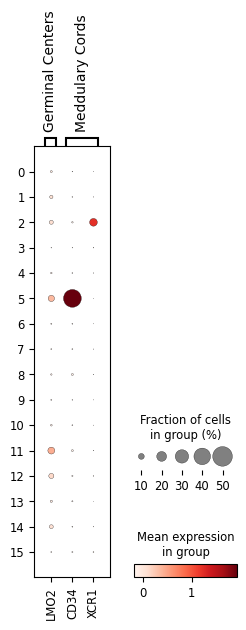

In [16]:
sc.pl.dotplot(andata, marker_genes, groupby="cluster")

In [22]:
df = pd.DataFrame({'cluster':andata.obs['cluster'],'x':andata.obsm['spatial'][:,0],'y':andata.obsm['spatial'][:,1]})
color_map = andata.uns['clusterColorMap'].set_index('clusters')['colors'].to_dict()
color_map

{'6': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 '11': (0.7764705882352941, 0.8588235294117647, 0.9372549019607843, 1.0),
 '9': (0.4588235294117647, 0.4196078431372549, 0.6941176470588235, 1.0),
 '1': (0.9921568627450981, 0.5529411764705883, 0.23529411764705882, 1.0),
 '10': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 '5': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059, 1.0),
 '3': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 '7': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098, 1.0),
 '0': (0.807843137254902, 0.42745098039215684, 0.7411764705882353, 1.0),
 '4': (0.7803921568627451, 0.9137254901960784, 0.7529411764705882, 1.0),
 '8': (0.9058823529411765, 0.7294117647058823, 0.3215686274509804, 1.0),
 '15': (0.9058823529411765, 0.5882352941176471, 0.611764705882353, 1.0),
 '12': (0.38823529411764707, 0.4745098039215686, 0.2235294117647059, 1.0),
 '2': (0.2235294117647059, 0.23137254901960785, 0.474509

In [23]:
df['color'] = df['cluster'].astype(str).map(color_map)

/tmp/ipykernel_495323/3163681557.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_temp = cluster_data['color'][0]


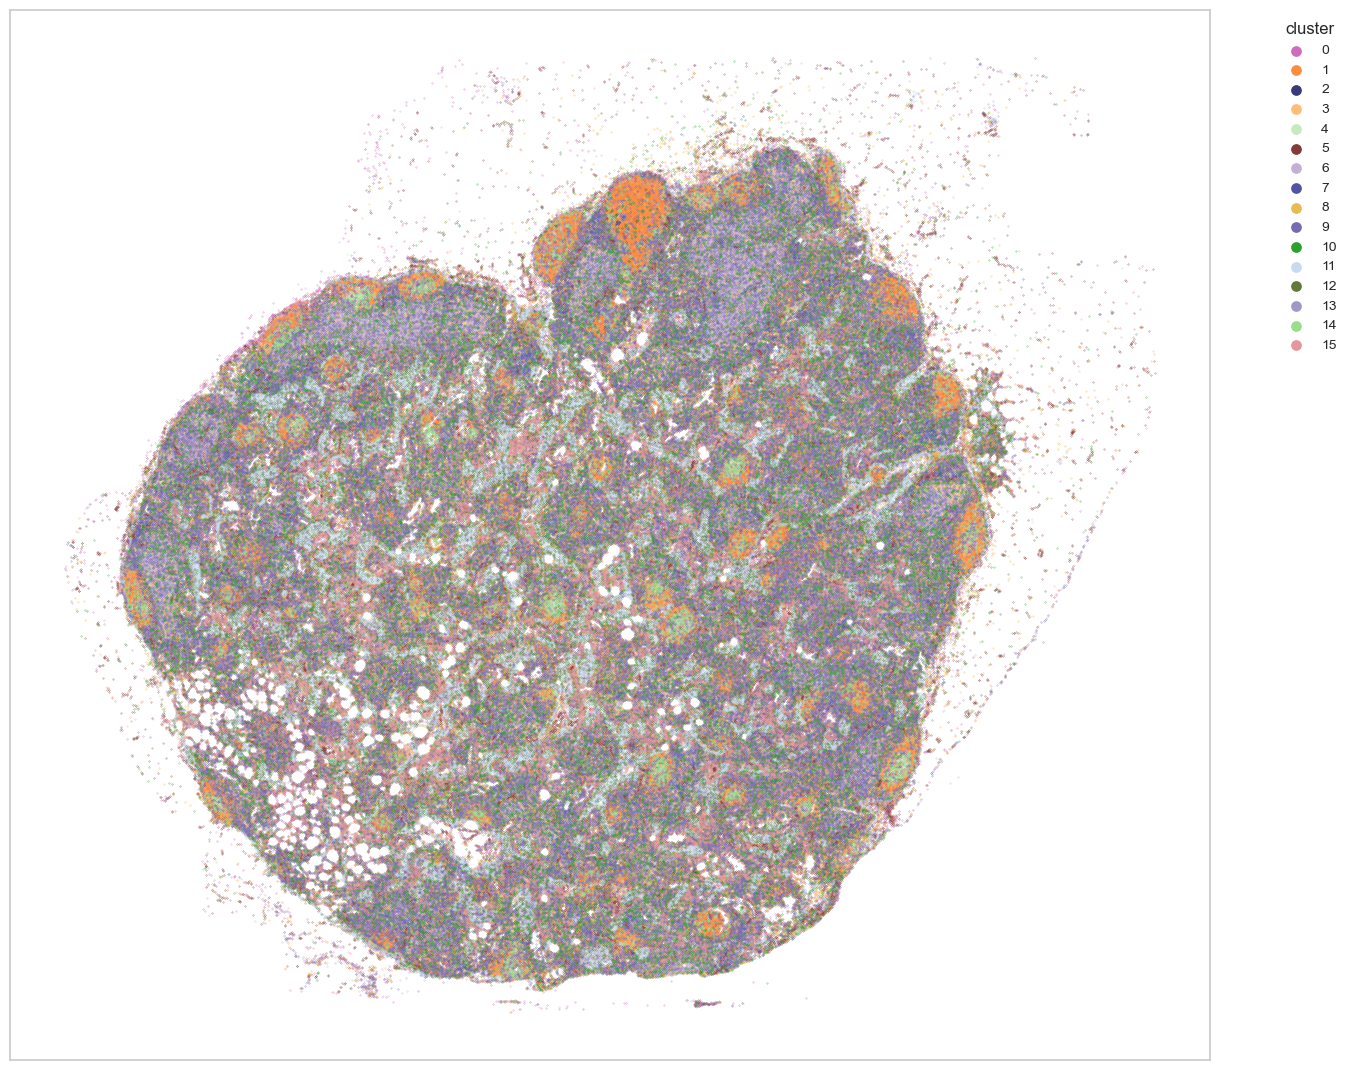

In [27]:
sns.set_theme(style="whitegrid", palette="pastel")
color_container = []

fig, ax = plt.subplots(1, 1, figsize=(15,15))
clusters = sorted(np.unique(df['cluster'].values), key=int)
for i, cluster in enumerate(clusters):
    cluster_data = df[df['cluster'] == cluster]
    color_temp = cluster_data['color'][0]
    ax.scatter( x=cluster_data['x'], y=cluster_data['y'], color=color_temp, label=f'{cluster}', s=0.05, alpha=1)

ax.set_xticks([])
ax.set_yticks([])
# ax.set_xlabel(xlab)
# ax.set_ylabel(ylab)
# ax.set_title(title)
legend = ax.legend(title='cluster',
                    bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
                    loc='upper left',
                    fontsize='small',  # Control the font size
                    title_fontsize='medium',
                     markerscale=30,  # Increase the size of the legend markers
                    frameon=False)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)